# Part 1

In [123]:
import matplotlib.pyplot as plt
import numpy as np
# lr is learning rate.
#n_it is the number of iterations.
def Logistic_reg_1(X,y,lr,n_it):
    X=np.array(X)
    y=np.array(y)
    lst_loss=[]
    lst_beta_zero=[]
    lst_beta_one=[]
    lst_Hyp=[]
    beta_zero=0
    beta_one=0
    Hyp=1/(1+np.exp(-(beta_zero+beta_one*X[:,0]))) 
    dbeta_zero=sum(Hyp-y)
    dbeta_one=sum((Hyp-y)*X[:,0])
    for j in range(n_it):
        beta_zero=beta_zero-lr*(1/len(X))*dbeta_zero
        beta_one=beta_one-lr*(1/len(X))*dbeta_one
        Hyp=1/(1+np.exp(-(beta_zero+beta_one*X[:,0]))) 
        dbeta_zero=sum(Hyp-y)
        dbeta_one=sum((Hyp-y)*X[:,0])
        hyp=Hyp
        for i in range(len(hyp)):
            if (hyp[i]>=0.5):
                hyp[i]=1
            else:
                hyp[i]=0
        corr_pred=len([i for i in range(len(hyp)) if (hyp[i]==y[i])])
        loss=(100*(len(y)-corr_pred)/len(y))
        lst_beta_zero.append(beta_zero)
        lst_beta_one.append(beta_one)
        lst_Hyp.append(Hyp)
        lst_loss.append(loss)
    
    min_it_ind=[]
    it_ind=[]
    for i in range(len(lst_loss)):
        if(lst_loss[i]==min(lst_loss)):
            min_it_ind.append(i)
    for i in range(1,len(min_it_ind)):
        if(min_it_ind[i]-min_it_ind[i-1]==1):
            it_ind.append(min_it_ind[i-1])
            it_ind.append(min_it_ind[i])
    for i in range(len(min_it_ind)):
        if(len(min_it_ind)==1):  
            it_ind.append(min_it_ind[0])
           
    init=[1]
    lst_great_1=[]
    lst_dif=init+[it_ind[i]-it_ind[i-1] for i in range(1,len(it_ind))]
    for i in range(len(lst_dif)):
        if(lst_dif[i]>1):
            lst_great_1.append(i)
    if(len(lst_great_1)<1):
        N_iteration=it_ind[0]
    else:
        N_iteration=it_ind[lst_great_1[len(lst_great_1)-1]] 
    A=('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2))+'%.'
       +' The algorithm converge to minimum loss after ' 
       + str(N_iteration)+ ' iterations  ' + '\x1b[0m') 
    B= ('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
        +' The algorithm converge to a loss higher than minimum loss ' + '\x1b[0m')
    C=( '\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
    +' The algorithm does not converge ' + '\x1b[0m')
    
    
    if(lst_loss[N_iteration]==lst_loss[len(lst_loss)-1] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1):
        opt=A
    elif(lst_loss[N_iteration]!=lst_loss[len(lst_loss)-2] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1 ):
        opt=B
    elif(len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))>1  ):
        opt=C
    
    return lst_loss,opt, N_iteration
     
    
    
#print(lst_loss)

In [124]:
import numpy as np
X = np.asarray([[0.50], [0.75], [1.00], [1.25], [1.50],
[1.75], [1.75], [2.00], [2.25], [2.50], [2.75],
[3.00], [3.25], [3.50], [4.00], [4.25], [4.50],
[4.75], [5.00], [5.50]])
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

 Minimum loss obtain is 20.0%. The algorithm converge to minimum loss after 29 iterations  


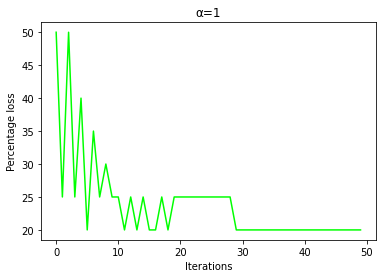

In [125]:
lr=1
lst_loss=Logistic_reg_1(X,y,lr,50)[0]
iteration=[i for i in range(len(lst_loss))]
plt.plot(iteration,lst_loss, color='lime')
plt.xlabel('Iterations')
plt.ylabel('Percentage loss')
plt.title('α='+str(lr))
print(Logistic_reg_1(X,y,lr,50)[1])

 Minimum loss obtain is 20.0%. The algorithm converge to minimum loss after 305 iterations  


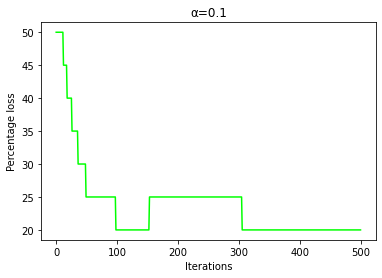

In [126]:
lr=0.1
lst_loss=Logistic_reg_1(X,y,lr,500)[0]
iteration=[i for i in range(len(lst_loss))]
plt.plot(iteration,lst_loss, color='lime')
plt.xlabel('Iterations')
plt.ylabel('Percentage loss')
plt.title('α='+str(lr))
print(Logistic_reg_1(X,y,lr,500)[1])

 Minimum loss obtain is 20.0%. The algorithm converge to minimum loss after 3056 iterations  


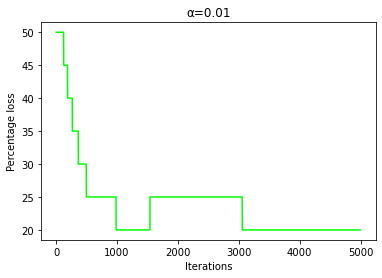

In [127]:
lr=0.01
lst_loss=Logistic_reg_1(X,y,lr,5000)[0]
iteration=[i for i in range(len(lst_loss))]
plt.plot(iteration,lst_loss, color='lime')
plt.xlabel('Iterations')
plt.ylabel('Percentage loss')
plt.title('α='+str(lr))
print(Logistic_reg_1(X,y,lr,5000)[1])

 Minimum loss obtain is 20.0%. The algorithm does not converge 


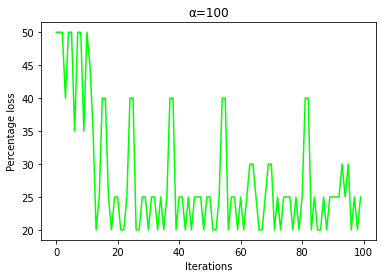

In [128]:
lr=100
lst_loss=Logistic_reg_1(X,y,lr,100)[0]
iteration=[i for i in range(len(lst_loss))]
plt.plot(iteration,lst_loss, color='lime')
plt.xlabel('Iterations')
plt.ylabel('Percentage loss')
plt.title('α='+str(lr))
print(Logistic_reg_1(X,y,lr,100)[1])

Text(0, 0.5, 'Number of iteration to minimum loss')

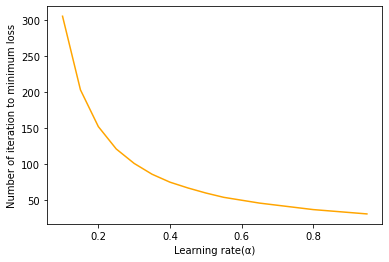

In [129]:
import numpy as np
alpha=np.arange(0.1,1,0.05)
N_it=[]
for lr in alpha:
    n_it=Logistic_reg_1(X,y,lr,5000)[2]
    N_it.append(n_it)  

plt.plot(alpha,N_it, color='orange')
plt.xlabel('Learning rate(α)')
plt.ylabel('Number of iteration to minimum loss')

# Part 2

## Exploratory data analysis (scatter plot)

In [130]:
import pandas as pd
import seaborn as sns
data=pd.read_csv("cwbdata.csv",header=None)
data.columns =['X1', 'X2', 'label']
data.head()

,X1,X2,label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

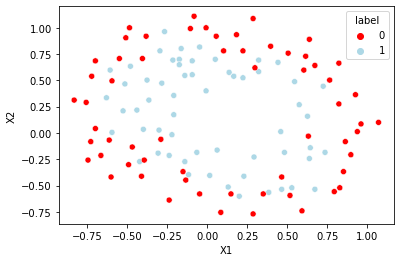

In [225]:
sns.scatterplot(data=data, x="X1", y="X2", hue='label', palette=['red','lightblue'])

In [132]:
f1=data['X1'].to_list()
f2=data['X2'].to_list()
label=data['label'].to_list()

X=[[f1[i],f2[i]] for i in range(len(f1))]
y=label

##  (a) Sigmoid with linear model 

In [133]:
def model(X,param):
    X=np.array(X)
    h=opt_param[0]+opt_param[1]*X[:,0]+opt_param[2]*X[:,1]
    model=1/(1+np.exp(-h))
    return model

In [134]:
import matplotlib.pyplot as plt
import copy
# lr is learning rate.
#n_it is the number of iterations.
def Logistic_reg_2(X,y,lr,n_it):
    lst_loss=[]
    lst_beta_zero=[]
    lst_beta_one=[]
    lst_beta_two=[]
    lst_Hyp=[]
    beta_zero=0
    beta_one=0
    beta_two=0
    Hyp=[1/(1+np.exp(-(beta_zero+beta_one*X[i][0]+beta_two*X[i][1]))) for i in range(len(X))]
    dbeta_zero=sum([Hyp[i]-y[i] for i in range(len(Hyp))])
    dbeta_one=sum([(Hyp[i]-y[i])*X[i][0] for i in range(len(Hyp))])
    dbeta_two=sum([(Hyp[i]-y[i])*X[i][1] for i in range(len(Hyp))])
    for j in range(n_it):
        beta_zero=beta_zero-lr*(1/len(X))*dbeta_zero
        beta_one=beta_one-lr*(1/len(X))*dbeta_one
        beta_two=beta_two-lr*(1/len(X))*dbeta_two
        Hyp=[1/(1+np.exp(-(beta_zero+beta_one*X[i][0]+beta_two*X[i][1]))) for i in range(len(X))]
        dbeta_zero=sum([Hyp[i]-y[i] for i in range(len(Hyp))])
        dbeta_one=sum([(Hyp[i]-y[i])*X[i][0] for i in range(len(Hyp))])
        dbeta_two=sum([(Hyp[i]-y[i])*X[i][1] for i in range(len(Hyp))])
        hyp=copy.deepcopy(Hyp)
        for i in range(len(hyp)):
            if (hyp[i]>=0.5):
                hyp[i]=1
            else:
                hyp[i]=0
        corr_pred=len([i for i in range(len(hyp)) if (hyp[i]==y[i])])
        loss=(100*(len(y)-corr_pred)/len(y))
        lst_beta_zero.append(beta_zero)
        lst_beta_one.append(beta_one)
        lst_beta_two.append(beta_two)
        lst_Hyp.append(Hyp)
        lst_loss.append(loss)
    #iteration=[i for i in range(len(lst_loss))]
    #plt.plot(iteration,lst_loss, color='orange')
    #plt.xlabel('Iterations')
    #plt.ylabel('Percentage loss')
    min_it_ind=[]
    it_ind=[]
    for i in range(len(lst_loss)):
        if(lst_loss[i]==min(lst_loss)):
            min_it_ind.append(i)
    for i in range(1,len(min_it_ind)):
        if(min_it_ind[i]-min_it_ind[i-1]==1):
            it_ind.append(min_it_ind[i-1])
            it_ind.append(min_it_ind[i])
    for i in range(len(min_it_ind)):
        if(len(min_it_ind)==1):  
            it_ind.append(min_it_ind[0])
            
    init=[1]
    lst_great_1=[]
    lst_dif=init+[it_ind[i]-it_ind[i-1] for i in range(1,len(it_ind))]
    for i in range(len(lst_dif)):
        if(lst_dif[i]>1):
            lst_great_1.append(i)
    if(len(lst_great_1)<1):
        N_iteration=it_ind[0]
    else:
        N_iteration=it_ind[lst_great_1[len(lst_great_1)-1]] 
    A=('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2))+'%.'
       +' The algorithm converge to minimum loss after ' 
       + str(N_iteration)+ ' iterations  ' + '\x1b[0m') 
    B= ('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
        +' The algorithm converge to a loss higher than minimum loss ' + '\x1b[0m')
    C=( '\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
    +' The algorithm does not converge ' + '\x1b[0m')
    if(lst_loss[N_iteration]==lst_loss[len(lst_loss)-1] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1):
        opt=A
    elif(lst_loss[N_iteration]!=lst_loss[len(lst_loss)-2] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1 ):
        opt=B
    elif(len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))>1  ):
        opt=C
    
    param=[lst_beta_zero[N_iteration],lst_beta_one[N_iteration],lst_beta_two[N_iteration]]
    return  lst_loss,param,lst_Hyp,opt
#print(lst_loss)

 Minimum loss obtain is 44.92%. The algorithm converge to minimum loss after 890 iterations  


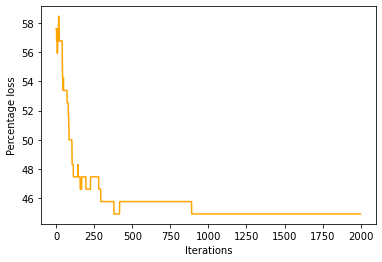

In [135]:
lst_loss=Logistic_reg_2(X,y,0.1,2000)[0]
iteration=[i for i in range(len(lst_loss))]
plt.plot(iteration,lst_loss, color='orange')
plt.xlabel('Iterations')
plt.ylabel('Percentage loss')
print(Logistic_reg_2(X,y,0.1,2000)[3])

In [136]:
opt_param=Logistic_reg_2(X,y,0.1,2000)[1]
opt_param

[-0.014560594761086083, -0.3016787331278798, -0.01702962465046904]

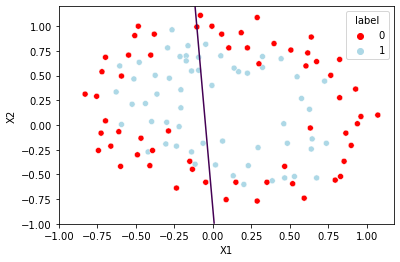

In [224]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(-1.0, 1.0, 100)
b = np.linspace(-1.0, 1.2, 100)
A, B = np.meshgrid(a,b)
F = opt_param[0]+opt_param[1]*A+opt_param[2]*B
plt.contour(A,B,F,[0],)

sns.scatterplot(data=data, x="X1", y="X2", hue='label',palette=['red','lightblue'])
plt.show()

In [138]:
def model_predict_prob(X,opt_param):
    if (len(opt_param)==3):
        f=(opt_param[0]+opt_param[1]*grid[:,0]+opt_param[2]*grid[:,1])
        probs=1/(1+np.exp(-f))
    elif(len(opt_param)==4):
        f=(opt_param[0]+opt_param[1]*grid[:,0]+opt_param[2]*grid[:,1]+opt_param[3]*(grid[:,0]**2
        +grid[:,1]**2))
        probs=1/(1+np.exp(-f))
        
    elif(len(opt_param)==5):
        f=(opt_param[0]+opt_param[1]*grid[:,0]+opt_param[2]*grid[:,1]+opt_param[3]*grid[:,0]**2
        +opt_param[4]*grid[:,1]**2)
        probs=1/(1+np.exp(-f))
    elif(len(opt_param)==6):
        f=(opt_param[0]+opt_param[1]*grid[:,0]+opt_param[2]*grid[:,1]+opt_param[3]*grid[:,0]**2
        +opt_param[4]*grid[:,1]**2+opt_param[5]*grid[:,0]*grid[:,1])
        probs=1/(1+np.exp(-f))
    elif(len(opt_param)==8):
        f=(opt_param[0]+opt_param[1]*grid[:,0]+opt_param[2]*grid[:,1]+opt_param[3]*grid[:,0]**2
        +opt_param[4]*grid[:,1]**2+opt_param[5]*grid[:,0]*grid[:,1]
        +opt_param[6]*grid[:,0]**3+opt_param[7]*grid[:,1]**3)
        probs=1/(1+np.exp(-f))
    else:
        f=(opt_param[0]+opt_param[1]*grid[:,0]+opt_param[2]*grid[:,1]+opt_param[3]*grid[:,0]**2
        +opt_param[4]*grid[:,1]**2+opt_param[5]*grid[:,0]*grid[:,1]
        +opt_param[6]*grid[:,0]**3+opt_param[7]*grid[:,1]**3+opt_param[8]*(grid[:,0]**2+grid[:,1]**2))
        probs=1/(1+np.exp(-f))
        
    return probs
              

In [139]:
opt_param0=Logistic_reg_2(X,y,0.1,2000)[1]
opt_param0

[-0.014560594761086083, -0.3016787331278798, -0.01702962465046904]

# Example code for visualizing decision boundary

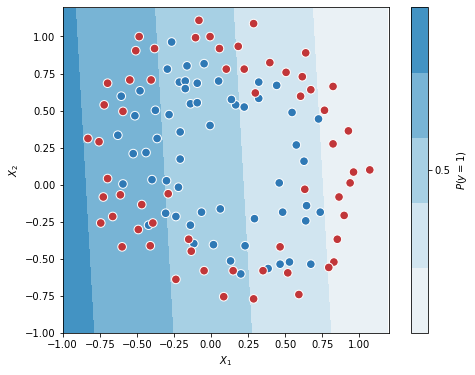

In [140]:
import numpy as np
import matplotlib.pyplot as plt
xx, yy = np.mgrid[-1:1.2:.01, -1:1.2:.01]
grid= np.c_[xx.ravel(), yy.ravel()]
def print_dec_boundary( X_test,y_test,opt_param):
    xx, yy = np.mgrid[-1:1.2:.01, -1:1.2:.01]
    grid=np.c_[xx.ravel(), yy.ravel()]
    probs=model_predict_prob(grid,opt_param).reshape(xx.shape) 
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 4, cmap="RdBu",
                        vmin=0.1, vmax=0.7)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])
    ax.scatter(X_test[:,0], X_test[:, 1], c=y_test[:], s=75, cmap="RdBu", 
             vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
    ax.set(aspect="equal",
        xlim=(-1, 1.2), ylim=(-1, 1.2),
        xlabel="$X_1$", ylabel="$X_2$") 
    
X=np.array(X)
y=np.array(y)
print_dec_boundary(X,y,opt_param0)

## (b) Sigmoid with non-linear models

# (1) elliptic function with variables(x1,x2,x1^2,x2^2,x1x2)

In [141]:
import matplotlib.pyplot as plt
import copy
# lr is learning rate.
#n_it is the number of iterations.
def Logistic_reg_3(X,y,lr,n_it):
    lst_loss=[]
    lst_beta_zero=[]
    lst_beta_one=[]
    lst_beta_two=[]
    lst_beta_three=[]
    lst_beta_four=[]
    lst_beta_five=[]
    lst_Hyp=[]
    beta_zero=0
    beta_one=0
    beta_two=0
    beta_three=0
    beta_four=0
    beta_five=0
    Hyp=[1/(1+np.exp(-(beta_zero+beta_one*(X[i][0])+beta_two*(X[i][1])+beta_three*(X[i][0])**2+
                       beta_four*(X[i][1])**2+beta_five*(X[i][0])*X[i][1]))) for i in range(len(X))]
    dbeta_zero=sum([Hyp[i]-y[i] for i in range(len(Hyp))])
    dbeta_one=sum([(Hyp[i]-y[i])*(X[i][0]) for i in range(len(Hyp))])
    dbeta_two=sum([(Hyp[i]-y[i])*(X[i][1]) for i in range(len(Hyp))])
    dbeta_three=sum([(Hyp[i]-y[i])*(X[i][0])**2 for i in range(len(Hyp))])
    dbeta_four=sum([(Hyp[i]-y[i])*(X[i][1])**2 for i in range(len(Hyp))])
    dbeta_five=sum([(Hyp[i]-y[i])*(X[i][0])*(X[i][1]) for i in range(len(Hyp))])
    
    
    for j in range(n_it):
        beta_zero=beta_zero-lr*(1/len(X))*dbeta_zero
        beta_one=beta_one-lr*(1/len(X))*dbeta_one
        beta_two=beta_two-lr*(1/len(X))*dbeta_two
        beta_three=beta_three-lr*(1/len(X))*dbeta_three
        beta_four=beta_four-lr*(1/len(X))*dbeta_four
        beta_five=beta_five-lr*(1/len(X))*dbeta_five
        Hyp=[1/(1+np.exp(-(beta_zero+beta_one*(X[i][0])+beta_two*(X[i][1])+beta_three*(X[i][0])**2+
                       beta_four*(X[i][1])**2+beta_five*(X[i][0])*X[i][1]))) for i in range(len(X))]
        dbeta_zero=sum([Hyp[i]-y[i] for i in range(len(Hyp))])
        dbeta_one=sum([(Hyp[i]-y[i])*(X[i][0]) for i in range(len(Hyp))])
        dbeta_two=sum([(Hyp[i]-y[i])*(X[i][1]) for i in range(len(Hyp))])
        dbeta_three=sum([(Hyp[i]-y[i])*(X[i][0])**2 for i in range(len(Hyp))])
        dbeta_four=sum([(Hyp[i]-y[i])*(X[i][1])**2 for i in range(len(Hyp))])
        dbeta_five=sum([(Hyp[i]-y[i])*(X[i][0])*(X[i][1]) for i in range(len(Hyp))])
        hyp=copy.deepcopy(Hyp)
        for i in range(len(hyp)):
            if (hyp[i]>=0.5):
                hyp[i]=1
            else:
                hyp[i]=0
        corr_pred=len([i for i in range(len(hyp)) if (hyp[i]==y[i])])
        loss=(100*(len(y)-corr_pred)/len(y))
        lst_beta_zero.append(beta_zero)
        lst_beta_one.append(beta_one)
        lst_beta_two.append(beta_two)
        lst_beta_three.append(beta_three)
        lst_beta_four.append(beta_four)
        lst_beta_five.append(beta_five)
        lst_Hyp.append(Hyp)
        lst_loss.append(loss)
    
    min_it_ind=[]
    it_ind=[]
    for i in range(len(lst_loss)):
        if(lst_loss[i]==min(lst_loss)):
            min_it_ind.append(i)
    for i in range(1,len(min_it_ind)):
        if(min_it_ind[i]-min_it_ind[i-1]==1):
            it_ind.append(min_it_ind[i-1])
            it_ind.append(min_it_ind[i])
    for i in range(len(min_it_ind)):
        if(len(min_it_ind)==1):  
            it_ind.append(min_it_ind[0])
            
    init=[1]
    lst_great_1=[]
    lst_dif=init+[it_ind[i]-it_ind[i-1] for i in range(1,len(it_ind))]
    for i in range(len(lst_dif)):
        if(lst_dif[i]>1):
            lst_great_1.append(i)
    if(len(lst_great_1)<1):
        N_iteration=it_ind[0]
    else:
        N_iteration=it_ind[lst_great_1[len(lst_great_1)-1]] 
    A=('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2))+'%.'
       +' The algorithm converge to minimum loss after ' 
       + str(N_iteration)+ ' iterations  ' + '\x1b[0m') 
    B= ('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
        +' The algorithm converge to a loss higher than minimum loss ' + '\x1b[0m')
    C=( '\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
    +' The algorithm does not converge ' + '\x1b[0m')
    
    if(lst_loss[N_iteration]==lst_loss[len(lst_loss)-1] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1):
        opt=A
    elif(lst_loss[N_iteration]!=lst_loss[len(lst_loss)-2] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1 ):
        opt=B
    elif(len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))>1  ):
        opt=C
    param=[lst_beta_zero[N_iteration],lst_beta_one[N_iteration],lst_beta_two[N_iteration],
          lst_beta_three[N_iteration],lst_beta_four[N_iteration],lst_beta_five[N_iteration]]
    return lst_loss,param,lst_Hyp,opt

In [142]:
opt_param1=Logistic_reg_3(X,y,1,2000)[1]


 Minimum loss obtain is 14.41%. The algorithm converge to minimum loss after 1369 iterations  


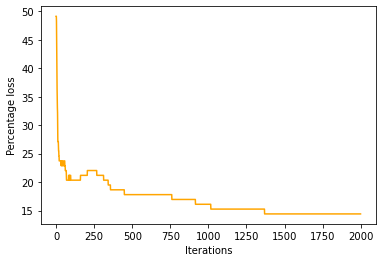

In [143]:
lst_loss=Logistic_reg_3(X,y,1,2000)[0]
iteration=[i for i in range(len(lst_loss))]
plt.plot(iteration,lst_loss, color='orange')
plt.xlabel('Iterations')
plt.ylabel('Percentage loss')
print(Logistic_reg_3(X,y,1,2000)[3])

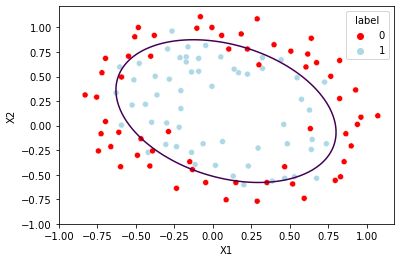

In [220]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(-1.0, 1.0, 100)
b = np.linspace(-1.0, 1.0, 100)
A, B = np.meshgrid(a,b)
F = opt_param1[0]+opt_param1[1]*A+opt_param1[2]*B+opt_param1[3]*A**2+opt_param1[4]*B**2+opt_param1[5]*A*B
plt.contour(A,B,F,[0])
sns.scatterplot(data=data, x="X1", y="X2", hue='label',palette=['red','lightblue'])
plt.show()

Text(0.5, 1.0, 'z₂')

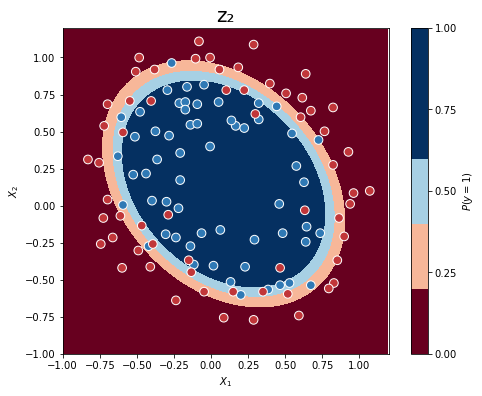

In [145]:
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

X=np.array(X)
y=np.array(y)
print_dec_boundary(X,y,opt_param1)
plt.title("z2".translate(SUB), fontsize=20)

# (2) elliptic function with variables(x1,x2,x1^2,x2^2)

In [146]:
import matplotlib.pyplot as plt
import copy
# lr is learning rate.
#n_it is the number of iterations.
def Logistic_reg_4(X,y,lr,n_it):
    lst_loss=[]
    lst_beta_zero=[]
    lst_beta_one=[]
    lst_beta_two=[]
    lst_beta_three=[]
    lst_beta_four=[]
    #lst_beta_five=[]
    lst_Hyp=[]
    beta_zero=0
    beta_one=0
    beta_two=0
    beta_three=0
    beta_four=0
    #beta_five=0
    Hyp=[1/(1+np.exp(-(beta_zero+beta_one*(X[i][0])+beta_two*(X[i][1])+beta_three*(X[i][0])**2+
                       beta_four*(X[i][1])**2))) for i in range(len(X))]
    dbeta_zero=sum([Hyp[i]-y[i] for i in range(len(Hyp))])
    dbeta_one=sum([(Hyp[i]-y[i])*(X[i][0]) for i in range(len(Hyp))])
    dbeta_two=sum([(Hyp[i]-y[i])*(X[i][1]) for i in range(len(Hyp))])
    dbeta_three=sum([(Hyp[i]-y[i])*(X[i][0])**2 for i in range(len(Hyp))])
    dbeta_four=sum([(Hyp[i]-y[i])*(X[i][1])**2 for i in range(len(Hyp))])
    #dbeta_five=sum([(Hyp[i]-y[i])*(X[i][0])*(X[i][1]) for i in range(len(Hyp))])
    
    
    for j in range(n_it):
        beta_zero=beta_zero-lr*(1/len(X))*dbeta_zero
        beta_one=beta_one-lr*(1/len(X))*dbeta_one
        beta_two=beta_two-lr*(1/len(X))*dbeta_two
        beta_three=beta_three-lr*(1/len(X))*dbeta_three
        beta_four=beta_four-lr*(1/len(X))*dbeta_four
        #beta_five=beta_five-lr*(1/len(X))*dbeta_five
        Hyp=[1/(1+np.exp(-(beta_zero+beta_one*(X[i][0])+beta_two*(X[i][1])+beta_three*(X[i][0])**2+
                       beta_four*(X[i][1])**2))) for i in range(len(X))]
        dbeta_zero=sum([Hyp[i]-y[i] for i in range(len(Hyp))])
        dbeta_one=sum([(Hyp[i]-y[i])*(X[i][0]) for i in range(len(Hyp))])
        dbeta_two=sum([(Hyp[i]-y[i])*(X[i][1]) for i in range(len(Hyp))])
        dbeta_three=sum([(Hyp[i]-y[i])*(X[i][0])**2 for i in range(len(Hyp))])
        dbeta_four=sum([(Hyp[i]-y[i])*(X[i][1])**2 for i in range(len(Hyp))])
        #dbeta_five=sum([(Hyp[i]-y[i])*(X[i][0])*(X[i][1]) for i in range(len(Hyp))])
        hyp=copy.deepcopy(Hyp)
        for i in range(len(hyp)):
            if (hyp[i]>=0.5):
                hyp[i]=1
            else:
                hyp[i]=0
        corr_pred=len([i for i in range(len(hyp)) if (hyp[i]==y[i])])
        loss=(100*(len(y)-corr_pred)/len(y))
        lst_beta_zero.append(beta_zero)
        lst_beta_one.append(beta_one)
        lst_beta_two.append(beta_two)
        lst_beta_three.append(beta_three)
        lst_beta_four.append(beta_four)
        #lst_beta_five.append(beta_five)
        lst_Hyp.append(Hyp)
        lst_loss.append(loss)
    min_it_ind=[]
    it_ind=[]
    for i in range(len(lst_loss)):
        if(lst_loss[i]==min(lst_loss)):
            min_it_ind.append(i)
    for i in range(1,len(min_it_ind)):
        if(min_it_ind[i]-min_it_ind[i-1]==1):
            it_ind.append(min_it_ind[i-1])
            it_ind.append(min_it_ind[i])
            
    init=[1]
    lst_great_1=[]
    lst_dif=init+[it_ind[i]-it_ind[i-1] for i in range(1,len(it_ind))]
    for i in range(len(lst_dif)):
        if(lst_dif[i]>1):
            lst_great_1.append(i)
    if(len(lst_great_1)<1):
        N_iteration=it_ind[0]
    else:
        N_iteration=it_ind[lst_great_1[len(lst_great_1)-1]] 
    A=('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2))+'%.'
       +' The algorithm converge to minimum loss after ' 
       + str(N_iteration)+ ' iterations  ' + '\x1b[0m') 
    B= ('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
        +' The algorithm converge to a loss higher than minimum loss ' + '\x1b[0m')
    C=( '\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
    +' The algorithm does not converge ' + '\x1b[0m')
    if(lst_loss[N_iteration]==lst_loss[len(lst_loss)-1] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1):
        opt=A
    elif(lst_loss[N_iteration]!=lst_loss[len(lst_loss)-2] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1 ):
        opt=B
    elif(len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))>1  ):
        opt=C
    
    param=[lst_beta_zero[N_iteration],lst_beta_one[N_iteration],lst_beta_two[N_iteration],
          lst_beta_three[N_iteration],lst_beta_four[N_iteration]]
    return lst_loss,param,lst_Hyp,opt

In [147]:
opt_param2=Logistic_reg_4(X,y,1,2000)[1]

 Minimum loss obtain is 18.64%. The algorithm converge to a loss higher than minimum loss 


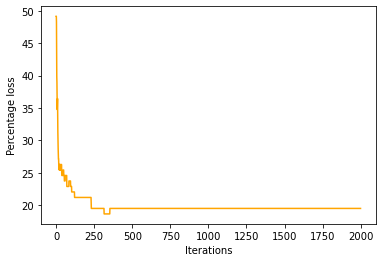

In [148]:
lst_loss=Logistic_reg_4(X,y,1,2000)[0]
iteration=[i for i in range(len(lst_loss))]
plt.plot(iteration,lst_loss, color='orange')
plt.xlabel('Iterations')
plt.ylabel('Percentage loss')
print(Logistic_reg_4(X,y,1,2000)[3])

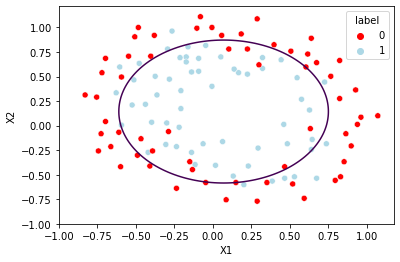

In [221]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(-1.0, 1.0, 100)
b = np.linspace(-1.0, 1.0, 100)
A, B = np.meshgrid(a,b)
F = opt_param2[0]+opt_param2[1]*A+opt_param2[2]*B+opt_param2[3]*A**2+opt_param2[4]*B**2
plt.contour(A,B,F,[0])
plt.legend('Decision boundary')
sns.scatterplot(data=data, x="X1", y="X2", hue='label',palette=['red','lightblue'])
plt.show()

Text(0.5, 1.0, 'z₁')

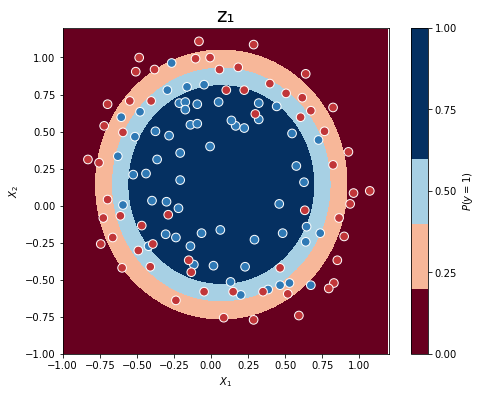

In [150]:
X=np.array(X)
y=np.array(y)
print_dec_boundary(X,y,opt_param2)
plt.title("z1".translate(SUB),fontsize=20)

# (3) elliptic function with variables(x1,x2,x1^2+x2^2)

In [151]:
import matplotlib.pyplot as plt
import copy
# lr is learning rate.
#n_it is the number of iterations.
def Logistic_reg_7(X,y,lr,n_it):
    lst_loss=[]
    lst_beta_zero=[]
    lst_beta_one=[]
    lst_beta_two=[]
    lst_beta_three=[]
    #lst_beta_four=[]
    #lst_beta_five=[]
    lst_Hyp=[]
    beta_zero=0
    beta_one=0
    beta_two=0
    beta_three=0
    #beta_four=0
    #beta_five=0
    Hyp=[1/(1+np.exp(-(beta_zero+beta_one*(X[i][0])+beta_two*(X[i][1])+
                       beta_three*((X[i][0])**2+(X[i][1])**2)))) for i in range(len(X))]
    dbeta_zero=sum([Hyp[i]-y[i] for i in range(len(Hyp))])
    dbeta_one=sum([(Hyp[i]-y[i])*(X[i][0]) for i in range(len(Hyp))])
    dbeta_two=sum([(Hyp[i]-y[i])*(X[i][1]) for i in range(len(Hyp))])
    dbeta_three=sum([(Hyp[i]-y[i])*((X[i][0])**2+(X[i][1])**2) for i in range(len(Hyp))])
    #dbeta_four=sum([(Hyp[i]-y[i])*(X[i][1])**2 for i in range(len(Hyp))])
    #dbeta_five=sum([(Hyp[i]-y[i])*(X[i][0])*(X[i][1]) for i in range(len(Hyp))])
    
    
    for j in range(n_it):
        beta_zero=beta_zero-lr*(1/len(X))*dbeta_zero
        beta_one=beta_one-lr*(1/len(X))*dbeta_one
        beta_two=beta_two-lr*(1/len(X))*dbeta_two
        beta_three=beta_three-lr*(1/len(X))*dbeta_three
        #beta_four=beta_four-lr*(1/len(X))*dbeta_four
        #beta_five=beta_five-lr*(1/len(X))*dbeta_five
        Hyp=[1/(1+np.exp(-(beta_zero+beta_one*(X[i][0])+beta_two*(X[i][1])+
                       beta_three*((X[i][0])**2+(X[i][1])**2)))) for i in range(len(X))]
        
        dbeta_zero=sum([Hyp[i]-y[i] for i in range(len(Hyp))])
        dbeta_one=sum([(Hyp[i]-y[i])*(X[i][0]) for i in range(len(Hyp))])
        dbeta_two=sum([(Hyp[i]-y[i])*(X[i][1]) for i in range(len(Hyp))])
        dbeta_three=sum([(Hyp[i]-y[i])*((X[i][0])**2++(X[i][1])**2) for i in range(len(Hyp))])
        #dbeta_four=sum([(Hyp[i]-y[i])*(X[i][1])**2 for i in range(len(Hyp))])
        #dbeta_five=sum([(Hyp[i]-y[i])*(X[i][0])*(X[i][1]) for i in range(len(Hyp))])
        hyp=copy.deepcopy(Hyp)
        for i in range(len(hyp)):
            if (hyp[i]>=0.5):
                hyp[i]=1
            else:
                hyp[i]=0
        corr_pred=len([i for i in range(len(hyp)) if (hyp[i]==y[i])])
        loss=(100*(len(y)-corr_pred)/len(y))
        lst_beta_zero.append(beta_zero)
        lst_beta_one.append(beta_one)
        lst_beta_two.append(beta_two)
        lst_beta_three.append(beta_three)
        #lst_beta_four.append(beta_four)
        #lst_beta_five.append(beta_five)
        lst_Hyp.append(Hyp)
        lst_loss.append(loss)
    min_it_ind=[]
    it_ind=[]
    for i in range(len(lst_loss)):
        if(lst_loss[i]==min(lst_loss)):
            min_it_ind.append(i)
    for i in range(1,len(min_it_ind)):
        if(min_it_ind[i]-min_it_ind[i-1]==1):
            it_ind.append(min_it_ind[i-1])
            it_ind.append(min_it_ind[i])
            
    init=[1]
    lst_great_1=[]
    lst_dif=init+[it_ind[i]-it_ind[i-1] for i in range(1,len(it_ind))]
    for i in range(len(lst_dif)):
        if(lst_dif[i]>1):
            lst_great_1.append(i)
    if(len(lst_great_1)<1):
        N_iteration=it_ind[0]
    else:
        N_iteration=it_ind[lst_great_1[len(lst_great_1)-1]] 
    A=('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2))+'%.'
       +' The algorithm converge to minimum loss after ' 
       + str(N_iteration)+ ' iterations  ' + '\x1b[0m') 
    B= ('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
        +' The algorithm converge to a loss higher than minimum loss ' + '\x1b[0m')
    C=( '\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
    +' The algorithm does not converge ' + '\x1b[0m')
    
    if(lst_loss[N_iteration]==lst_loss[len(lst_loss)-1] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1):
        opt=A
    elif(lst_loss[N_iteration]!=lst_loss[len(lst_loss)-2] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1 ):
        opt=B
    elif(len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))>1  ):
        opt=C
    param=[lst_beta_zero[N_iteration],lst_beta_one[N_iteration],lst_beta_two[N_iteration],
          lst_beta_three[N_iteration]]
    return lst_loss,param,lst_Hyp,opt

In [152]:
opt_Param3=Logistic_reg_7(X,y,1,2000)[1]

 Minimum loss obtain is 18.64%. The algorithm converge to a loss higher than minimum loss 


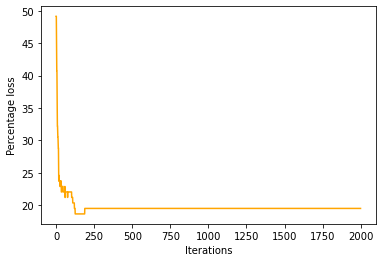

In [153]:
lst_loss=Logistic_reg_7(X,y,1,2000)[0]
iteration=[i for i in range(len(lst_loss))]
plt.plot(iteration,lst_loss, color='orange')
plt.xlabel('Iterations')
plt.ylabel('Percentage loss')
print(Logistic_reg_7(X,y,1,2000)[3])

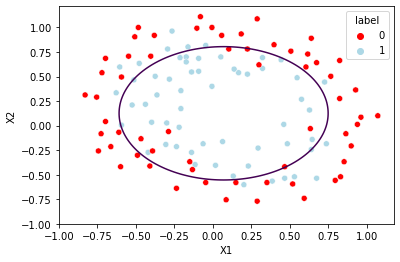

In [222]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(-1.0, 1.0, 100)
b = np.linspace(-1.0, 1.0, 100)
A, B = np.meshgrid(a,b)
F = opt_param2[0]+opt_param2[1]*A+opt_param2[2]*B+opt_param2[3]*(A**2+B**2)
plt.contour(A,B,F,[0])
plt.legend('Decision boundary')
sns.scatterplot(data=data, x="X1", y="X2", hue='label',palette=['red','lightblue'])
plt.show()

Text(0.5, 1.0, 'z₃')

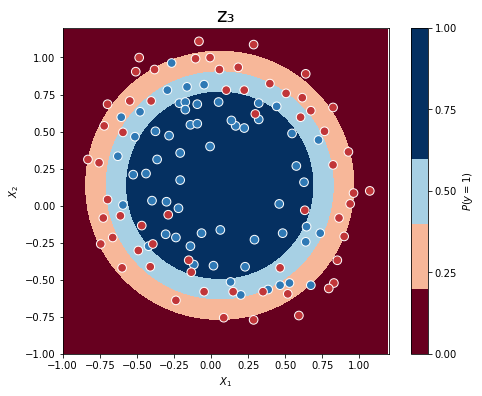

In [155]:
X=np.array(X)
y=np.array(y)
print_dec_boundary(X,y,opt_Param3)
plt.title("z3".translate(SUB), fontsize=20)

## Regularized Logistic Regression


In [196]:
import matplotlib.pyplot as plt
import copy
# lr is learning rate.
#n_it is the number of iterations.
def Logistic_reg_5(X,y,lr,n_it,ld):
    lst_loss=[]
    lst_beta_zero=[]
    lst_beta_one=[]
    lst_beta_two=[]
    lst_beta_three=[]
    lst_beta_four=[]
    lst_beta_five=[]
    lst_Hyp=[]
    beta_zero=0
    beta_one=0
    beta_two=0
    beta_three=0
    beta_four=0
    beta_five=0
   
    Hyp=[1/(1+np.exp(-(beta_zero+beta_one*(X[i][0])+beta_two*(X[i][1])+beta_three*(X[i][0])**2+
                       beta_four*(X[i][1])**2+beta_five*(X[i][0])*X[i][1]))) for i in range(len(X))]
    dbeta_zero=(1/len(X))*sum([Hyp[i]-y[i] for i in range(len(Hyp))])
    dbeta_one=(1/len(X))*sum([(Hyp[i]-y[i])*(X[i][0]) for i in range(len(Hyp))])+(ld/len(X))*beta_one
    dbeta_two=(1/len(X))*sum([(Hyp[i]-y[i])*(X[i][1]) for i in range(len(Hyp))])+(ld/len(X))*beta_two
    dbeta_three=(1/len(X))*sum([(Hyp[i]-y[i])*(X[i][0])**2 for i in range(len(Hyp))])+(ld/len(X))*beta_three
    dbeta_four=(1/len(X))*sum([(Hyp[i]-y[i])*(X[i][1])**2 for i in range(len(Hyp))])+(ld/len(X))*beta_four
    dbeta_five=(1/len(X))*sum([(Hyp[i]-y[i])*(X[i][0])*(X[i][1]) for i in range(len(Hyp))])+(ld/len(X))*beta_five
   
    for j in range(n_it):
        beta_zero=beta_zero-lr*dbeta_zero
        beta_one=beta_one-lr*dbeta_one
        beta_two=beta_two-lr*dbeta_two
        beta_three=beta_three-lr*dbeta_three
        beta_four=beta_four-lr*dbeta_four
        beta_five=beta_five-lr*dbeta_five
       
        Hyp=[1/(1+np.exp(-(beta_zero+beta_one*(X[i][0])+beta_two*(X[i][1])+beta_three*(X[i][0])**2+
                       beta_four*(X[i][1])**2+beta_five*(X[i][0])*X[i][1]))) for i in range(len(X))]
        dbeta_zero=(1/len(X))*sum([Hyp[i]-y[i] for i in range(len(Hyp))])
        dbeta_one=(1/len(X))*sum([(Hyp[i]-y[i])*(X[i][0]) for i in range(len(Hyp))])+(ld/len(X))*beta_one
        dbeta_two=(1/len(X))*sum([(Hyp[i]-y[i])*(X[i][1]) for i in range(len(Hyp))])+(ld/len(X))*beta_two
        dbeta_three=(1/len(X))*sum([(Hyp[i]-y[i])*(X[i][0])**2 for i in range(len(Hyp))])+(ld/len(X))*beta_three
        dbeta_four=(1/len(X))*sum([(Hyp[i]-y[i])*(X[i][1])**2 for i in range(len(Hyp))])+(ld/len(X))*beta_four
        dbeta_five=(1/len(X))*sum([(Hyp[i]-y[i])*(X[i][0])*(X[i][1]) for i in range(len(Hyp))])+(ld/len(X))*beta_five
        
        hyp=copy.deepcopy(Hyp)
        for i in range(len(hyp)):
            if (hyp[i]>=0.5):
                hyp[i]=1
            else:
                hyp[i]=0
        corr_pred=len([i for i in range(len(hyp)) if (hyp[i]==y[i])])
        loss=(100*(len(y)-corr_pred)/len(y))
        lst_beta_zero.append(beta_zero)
        lst_beta_one.append(beta_one)
        lst_beta_two.append(beta_two)
        lst_beta_three.append(beta_three)
        lst_beta_four.append(beta_four)
        lst_beta_five.append(beta_five)
       
        lst_Hyp.append(Hyp)
        lst_loss.append(loss)
    
    min_it_ind=[]
    it_ind=[]
    for i in range(len(lst_loss)):
        if(lst_loss[i]==min(lst_loss)):
            min_it_ind.append(i)
    for i in range(1,len(min_it_ind)):
        if(min_it_ind[i]-min_it_ind[i-1]==1):
            it_ind.append(min_it_ind[i-1])
            it_ind.append(min_it_ind[i])
        else:
             it_ind.append(min_it_ind[0])
            
    for i in range(len(min_it_ind)):
        if(len(min_it_ind)==1):  
            it_ind.append(min_it_ind[0])
   
    #print( it_ind)
    init=[1]
    lst_great_1=[]
    lst_dif=init+[it_ind[i]-it_ind[i-1] for i in range(1,len(it_ind))]
    for i in range(len(lst_dif)):
        if(lst_dif[i]>1):
            lst_great_1.append(i)
        else:
            pass
    
    if(len(lst_great_1)<1):
        N_iteration=it_ind[0]
    else:
        N_iteration=it_ind[lst_great_1[len(lst_great_1)-1]] 
    A=('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2))+'%.'
       +' The algorithm converge to minimum loss after ' 
       + str(N_iteration)+ ' iterations  ' + '\x1b[0m') 
    B= ('\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
        +' The algorithm converge to a loss higher than minimum loss ' + '\x1b[0m')
    C=( '\x1b[6;30;43m' +' Minimum loss obtain is '+ str(np.round(min(lst_loss),2)) +'%.'
    +' The algorithm does not converge ' + '\x1b[0m')
    
    if(lst_loss[N_iteration]==lst_loss[len(lst_loss)-1] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1):
        opt=A
    elif(lst_loss[N_iteration]!=lst_loss[len(lst_loss)-2] and len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))==1 ):
        opt=B
    elif(len(set(lst_loss[len(lst_loss)-10:len(lst_loss)]))>1  ):
        opt=C
    param=[lst_beta_zero[N_iteration],lst_beta_one[N_iteration],lst_beta_two[N_iteration],
          lst_beta_three[N_iteration],lst_beta_four[N_iteration],lst_beta_five[N_iteration]]
    return lst_loss,param,lst_Hyp,opt


When Lambda= 0.0001
 Minimum loss obtain is 14.41%. The algorithm converge to minimum loss after 1371 iterations  

When Lambda= 0.001
 Minimum loss obtain is 14.41%. The algorithm converge to minimum loss after 1389 iterations  

When Lambda= 0.1
 Minimum loss obtain is 16.95%. The algorithm converge to minimum loss after 700 iterations  

When Lambda= 0
 Minimum loss obtain is 14.41%. The algorithm converge to minimum loss after 1369 iterations  

When Lambda= 1
 Minimum loss obtain is 18.64%. The algorithm converge to minimum loss after 138 iterations  

When Lambda= 10
 Minimum loss obtain is 25.42%. The algorithm converge to minimum loss after 39 iterations  

When Lambda= 100
 Minimum loss obtain is 49.15%. The algorithm converge to minimum loss after 0 iterations  

When Lambda= 10000
 Minimum loss obtain is 47.46%. The algorithm converge to a loss higher than minimum loss 


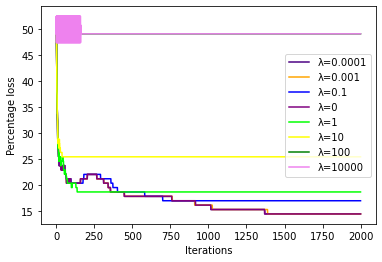

In [211]:
import warnings
warnings.filterwarnings("ignore")
lamb=[0.0001,0.001,0.1,0,1,10,100,10000]
color=['indigo','orange','blue','purple','lime','yellow','green','violet']
for i in range(len(lamb)):
    lst_loss=Logistic_reg_5(X,y,1,2000,lamb[i])[0]
    iteration=[i for i in range(len(lst_loss))]
    plt.plot(iteration,lst_loss, color=color[i])
    plt.xlabel('Iterations')
    plt.ylabel('Percentage loss')
    plt.legend(['λ=0.0001','λ=0.001','λ=0.1','λ=0','λ=1','λ=10','λ=100','λ=10000'])
    print("\nWhen Lambda=", lamb[i])
    print(Logistic_reg_5(X,y,1,2000,lamb[i])[3])

In [209]:
lamb=[0.0001,0.001,0.1,0,1,10,100,10000]
param=[Logistic_reg_5(X,y,1,2000,ld)[1] for ld in lamb]

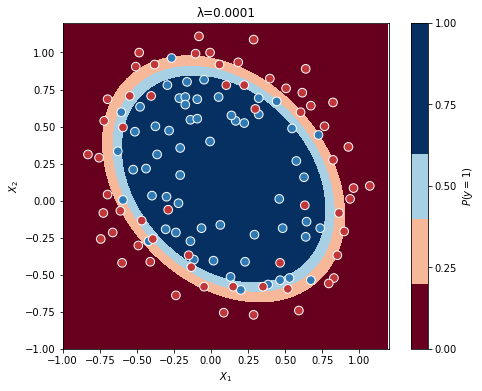

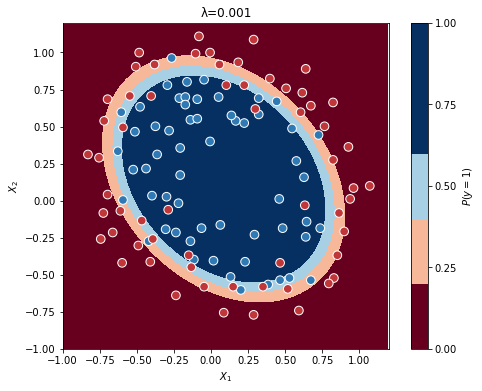

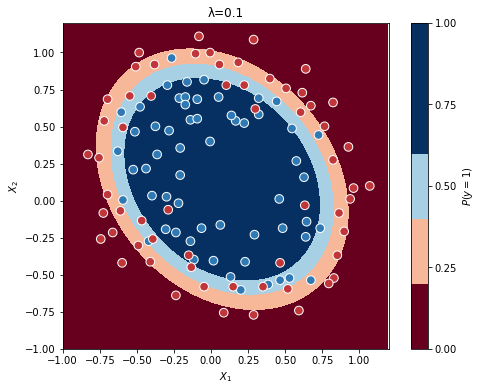

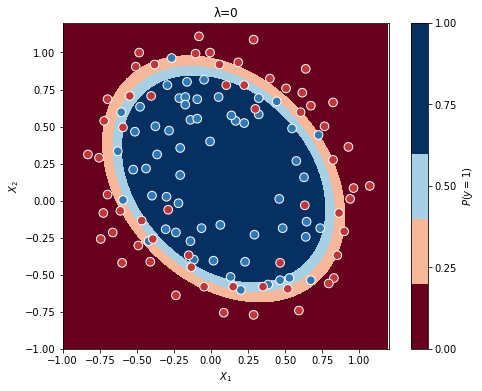

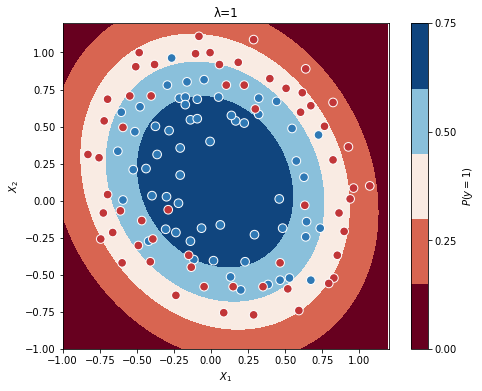

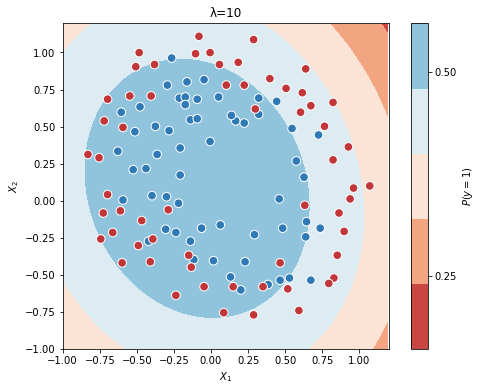

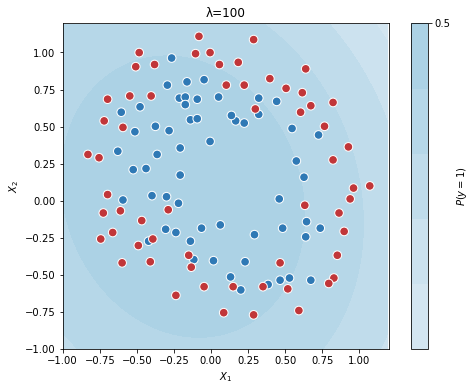

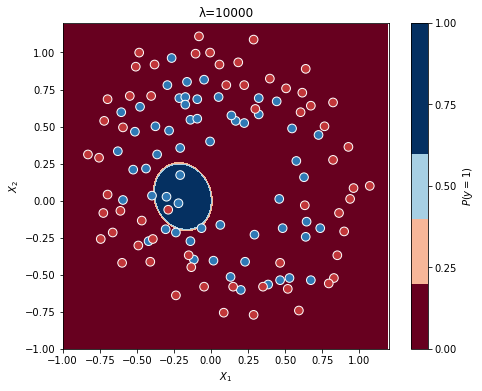

In [210]:
import numpy as np
import matplotlib.pyplot as plt
def print_dec_boundary( X_test,y_test,opt_param):
    xx, yy = np.mgrid[-1:1.2:.01, -1:1.2:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs=model_predict_prob(grid,opt_param).reshape(xx.shape) 
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 4, cmap="RdBu",
                        vmin=0.1, vmax=0.7)
    #print("\nWhen Lambda=", lamb[i])
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])
    ax.scatter(X_test[:,0], X_test[:, 1], c=y_test[:], s=75, cmap="RdBu", 
             vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)
    ax.set(aspect="equal",
        xlim=(-1, 1.2), ylim=(-1, 1.2),
        xlabel="$X_1$", ylabel="$X_2$",title='λ='+str(lamb[i])) 
    
X=np.array(X)
y=np.array(y)
for i in range(len(lamb)):
    print_dec_boundary(X,y,param[i])
   